# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [42]:
# (*) List all imports here so that, all imports can be done in a single place.
# useful if a saved model is run, and all initial steps are not required
import pickle
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import collections as col
import random
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import csv
from skimage.color import rgb2gray
from scipy import ndimage
import os
import math
from tqdm import tqdm
import cv2
import glob

In [43]:
#1 (*) Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data
training_file = '../data/train.p'
validation_file = '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels'] # X_train = images; y_train = [41 41 41 ..., 25 25 25]
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print('Done importing train, valid, test data')

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

# retain a copy of original images in this array
X_train_0, y_train_0 = X_train, y_train 
X_valid_0, y_valid_0  = X_valid, y_valid 
#print('X_train_0, y_train_0: ',X_train_0.shape, y_train_0.shape)

Done importing train, valid, test data



## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [44]:
#2 (*)
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
    
# Number of training examples
n_train = len(X_train) #X_train.shape = [34799, 32]

# Number of validation examples
n_validation = len(X_valid) #X_valid.shape = [4410, 32]

# Number of testing examples.
n_test = len(X_test) #X_test.shape = [12630, 32]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = y_train.max() + 1 # 43


print("Number of training examples =", n_train)         # 34799 samples
print("Number of validation examples =", n_validation)  # 4410 samples
print("Number of testing examples =", n_test)           # 12630 samples
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

is_features_normal = False

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

43


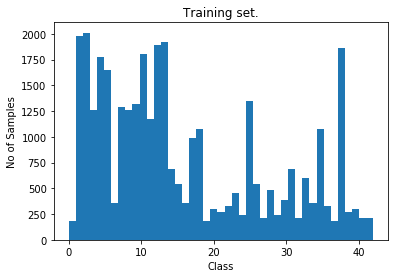

Classes:  43


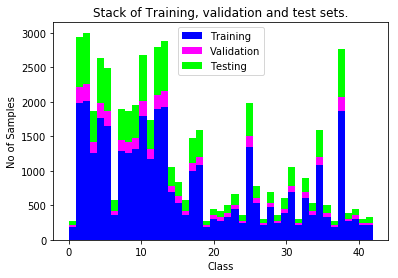

Training sample count by class(DESC): Counter({2: 2010, 1: 1980, 13: 1920, 12: 1890, 38: 1860, 10: 1800, 4: 1770, 5: 1650, 25: 1350, 9: 1320, 7: 1290, 3: 1260, 8: 1260, 11: 1170, 35: 1080, 18: 1080, 17: 990, 31: 690, 14: 690, 33: 599, 26: 540, 15: 540, 28: 480, 23: 450, 30: 390, 16: 360, 34: 360, 6: 360, 36: 330, 22: 330, 40: 300, 20: 300, 39: 270, 21: 270, 29: 240, 24: 240, 41: 210, 42: 210, 32: 210, 27: 210, 37: 180, 19: 180, 0: 180})

Validation sample count by class(DESC): Counter({1: 240, 13: 240, 2: 240, 4: 210, 5: 210, 38: 210, 10: 210, 12: 210, 3: 150, 11: 150, 9: 150, 8: 150, 7: 150, 25: 150, 35: 120, 18: 120, 17: 120, 31: 90, 33: 90, 14: 90, 15: 90, 36: 60, 26: 60, 23: 60, 40: 60, 22: 60, 16: 60, 34: 60, 6: 60, 30: 60, 21: 60, 20: 60, 28: 60, 41: 30, 37: 30, 19: 30, 42: 30, 0: 30, 32: 30, 27: 30, 29: 30, 24: 30, 39: 30})


In [45]:
# 3
#Plot histogram of the data labels (y_train)
# Import the `pyplot` module
import matplotlib.pyplot as plt 
import numpy as np
import collections as col


def single_histogram(data_in):
    #labels = y_train
    print(len(set(data_in))) #labels.shape = len((labels) = 34799
    # Make a histogram with 62 bins of the `labels` data
    plt.hist(data_in, 43)
    plt.xlabel("Class")
    plt.ylabel("No of Samples")
    plt.title("Training set.")
    plt.show()  #2,3,5,6,11,13,14,38 are represented more than others
    
    
def multi_histogram(data_in, leg_labels):
    labels = y_train
    #labels.shape = len((labels) = 34799
    n_bins = len(set(data_in[0]))
    print('Classes: ', n_bins)
    colors = ['blue', 'magenta', 'lime'] #cyan , tan
    plt.figure()
    plt.hist(data_in, n_bins, histtype='bar', stacked=True, color=colors, label=leg_labels) #, normed = True
    plt.xlabel("Class")
    plt.ylabel("No of Samples")
    plt.legend(loc='upper center')
    plt.title("Stack of Training, validation and test sets.")
    plt.show()
   
    
y_data = [y_train, y_valid, y_test]
leg_labels = ['Training', 'Validation', 'Testing']
legend_loc = 'upper center'

single_histogram(y_train)
multi_histogram(y_data, leg_labels)
print('Training sample count by class(DESC):', col.Counter(y_train))
print()
print('Validation sample count by class(DESC):', col.Counter(y_valid))

shape: (32, 32, 3), min: 30, max: 185
shape: (32, 32, 3), min: 41, max: 255
shape: (32, 32, 3), min: 21, max: 215
shape: (32, 32, 3), min: 27, max: 152


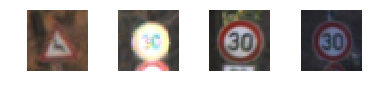

X_train.shape:  (34799, 32, 32, 3)
21


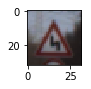

In [46]:
### Data exploration visualization code goes here.
### update this code to show plots of original vs pre process
# Import the `pyplot` module of `matplotlib`
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

n_images = 4
# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(X_train[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    print("shape: {0}, min: {1}, max: {2}".format(X_train[traffic_signs[i]].shape, 
                                                  X_train[traffic_signs[i]].min(), 
                                                  X_train[traffic_signs[i]].max()))

plt.show()


# Visualizations will be shown in the notebook.
print('X_train.shape: ', X_train.shape)
index = np.random.randint(0, len(X_train)) #get a single random int
index2 = np.random.randint(0, 1000,size=[1,4]) # get 4 random int; index2[0][0], index2[0][1] ...
image = X_train[index].squeeze()
#-----------
plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

['ClassId', 'SignName']
['0', 'Speed limit (20km/h)']
['1', 'Speed limit (30km/h)']
['2', 'Speed limit (50km/h)']
['3', 'Speed limit (60km/h)']
['4', 'Speed limit (70km/h)']
['5', 'Speed limit (80km/h)']
['6', 'End of speed limit (80km/h)']
['7', 'Speed limit (100km/h)']
['8', 'Speed limit (120km/h)']
['9', 'No passing']
['10', 'No passing for vehicles over 3.5 metric tons']
['11', 'Right-of-way at the next intersection']
['12', 'Priority road']
['13', 'Yield']
['14', 'Stop']
['15', 'No vehicles']
['16', 'Vehicles over 3.5 metric tons prohibited']
['17', 'No entry']
['18', 'General caution']
['19', 'Dangerous curve to the left']
['20', 'Dangerous curve to the right']
['21', 'Double curve']
['22', 'Bumpy road']
['23', 'Slippery road']
['24', 'Road narrows on the right']
['25', 'Road work']
['26', 'Traffic signals']
['27', 'Pedestrians']
['28', 'Children crossing']
['29', 'Bicycles crossing']
['30', 'Beware of ice/snow']
['31', 'Wild animals crossing']
['32', 'End of all speed and passin

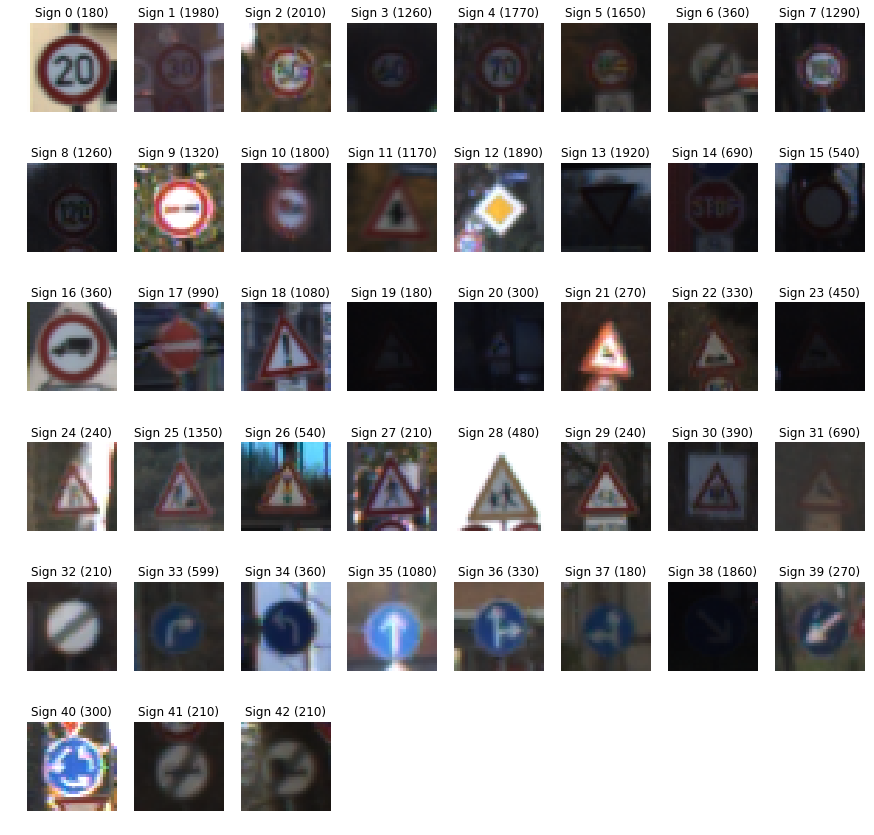

In [47]:
#4 
import matplotlib.pyplot as plt 
import csv

def print_sign_names():
    f = open('signnames.csv')
    csv_f = csv.reader(f)
    class_data = "NA"
    for row in csv_f:
        class_data = class_data + str(row)
        print(row)
    #print(class_data)


def show_sign_and_count(X_in, color_map):
    #labels = y_train
    # Get the unique labels 
    
    #print('show_sign_and_count 1: ', X_in.shape)
    #X_in = X_in.reshape(32,32) # the data is shaped as 32,32,1 after gray conversion as per Lenet placeholder
    #print('show_sign_and_count 2: ', X_in.shape)
    unique_labels = set(y_train)

    # Initialize the figure
    plt.figure(figsize=(15, 15))

    count = 1  # Set a counter
    print('unique_labels: ', unique_labels)

    # For each unique label,
    for label in unique_labels:

        #print('labels.index(label): ', labels.index(label))
        # You pick the first image for each label
        #image = X_train[labels.index(label)]
        first_index = np.where(y_train == label)
        image = X_in[first_index[0][0]]
        #print('image.shape: ', image.shape)
        #print('first_index[0][0]: ', len(first_index[0]))
        # Define 48 subplots 
        plt.subplot(6,8, count)
        
        plt.axis('off') # Don't include axes
        # Add a title to each subplot 
        plt.title("Sign {0} ({1})".format(label, len(first_index[0]))) #labels.count(label)
        count += 1 # update counter
        #print('color_map: ', color_map)
        if(color_map == "GRAY"):
            #print('gray color_map: ', color_map)
            plt.imshow(image, cmap="gray")
        else:    
            plt.imshow(image)

    plt.show() # Show the plot
    
    
print_sign_names()
show_sign_and_count(X_train, "NA")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [48]:
#5 (*)
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
'''
# Problem 1 - Implement Min-Max scaling for grayscale image data
def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

### DON'T MODIFY ANYTHING BELOW ###
# Test Cases
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 255])),
    [0.1, 0.103137254902, 0.106274509804, 0.109411764706, 0.112549019608, 0.11568627451, 0.118823529412, 0.121960784314,
     0.125098039216, 0.128235294118, 0.13137254902, 0.9],
    decimal=3)
np.testing.assert_array_almost_equal(
    normalize_grayscale(np.array([0, 1, 10, 20, 30, 40, 233, 244, 254,255])),
    [0.1, 0.103137254902, 0.13137254902, 0.162745098039, 0.194117647059, 0.225490196078, 0.830980392157, 0.865490196078,
     0.896862745098, 0.9])

if not is_features_normal:
    X_train = normalize_grayscale(X_train)
    X_valid = normalize_grayscale(X_valid)
    X_test = normalize_grayscale(X_test)
    is_features_normal = True
    
print('Tests Passed!')
'''

#Convert to grayscale
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

n_channels = 3 #if netowrk input is RGB
#X_train = np.array(X_train) # Convert to an array
def ConvertToGrayscale(X_in):
    print('X_in color shape', X_in.shape)
    gray_X = rgb2gray(X_in)
    print('gray_X gray shape 1', gray_X.shape)
    gray_X = gray_X.reshape(len(X_in),32,32,1)
    print('gray_X gray shape 2', gray_X.shape)
    global n_channels
    n_channels = 1 # for gray channel -- used for placeholder of x
    return gray_X


# Min-Max scaling for grayscale image data
# http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-min-max-scaling
#(pixel - 128)/ 128 is also similar
def normalize_scale(X):
    a = 0
    b = 1.0
    return a + X * (b-a) / 255

# http://lamda.nju.edu.cn/weixs/project/CNNTricks/CNNTricks.html
def standardize(X):
    X -= np.mean(X) # zero-center
    X /= np.std(X) # normalize
    return (X)

#this method always expects data as 32x32 not 32x32x1 which happens after gray scale conversion
def plotImage(X_in):
    #plot the images to check for gray scale
    traffic_signs = [300, 2250, 3650, 4000]
    for i in range(len(traffic_signs)):
        plt.subplot(1, 4, i+1)
        plt.axis('off')
        print('X_in[traffic_signs[i]].shape: ', X_in[traffic_signs[i]].shape)
        plt.imshow(X_in[traffic_signs[i]], cmap="gray")
        plt.subplots_adjust(wspace=0.5)

    # Show the plot
    plt.show()

# preprocessing pipeline
def preprocess_data(X):
    X = ConvertToGrayscale(X) #rgb2gray(X)
    X = np.array(X).astype(np.float32)  #not sure if this is needed
    X = normalize_scale(X)
    X = standardize(X)
    #plotImage(X)  #--requires image data as 32x32 or 32x32x3, does not work for 32x32x1 
    print('pre process - n_channels: ', n_channels)
    return X

X_in color shape (34799, 32, 32, 3)
gray_X gray shape 1 (34799, 32, 32)
gray_X gray shape 2 (34799, 32, 32, 1)
pre process - n_channels:  1
preprocessed.shape:  (34799, 32, 32, 1)
preprocessed[0].shape:  (32, 32, 1)
len(preprocessed):  34799
len(preprocessed_plot):  34799
preprocessed_plot[0].shape:  (32, 32)
preprocessed_plot.shape:  (34799, 32, 32)
unique_labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


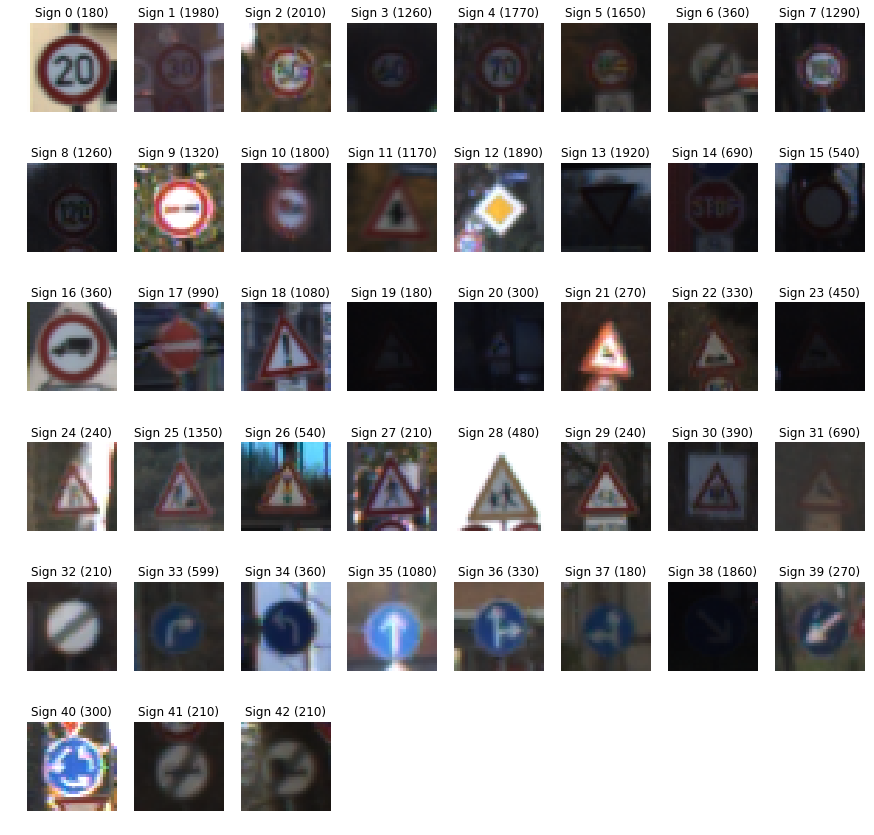

unique_labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


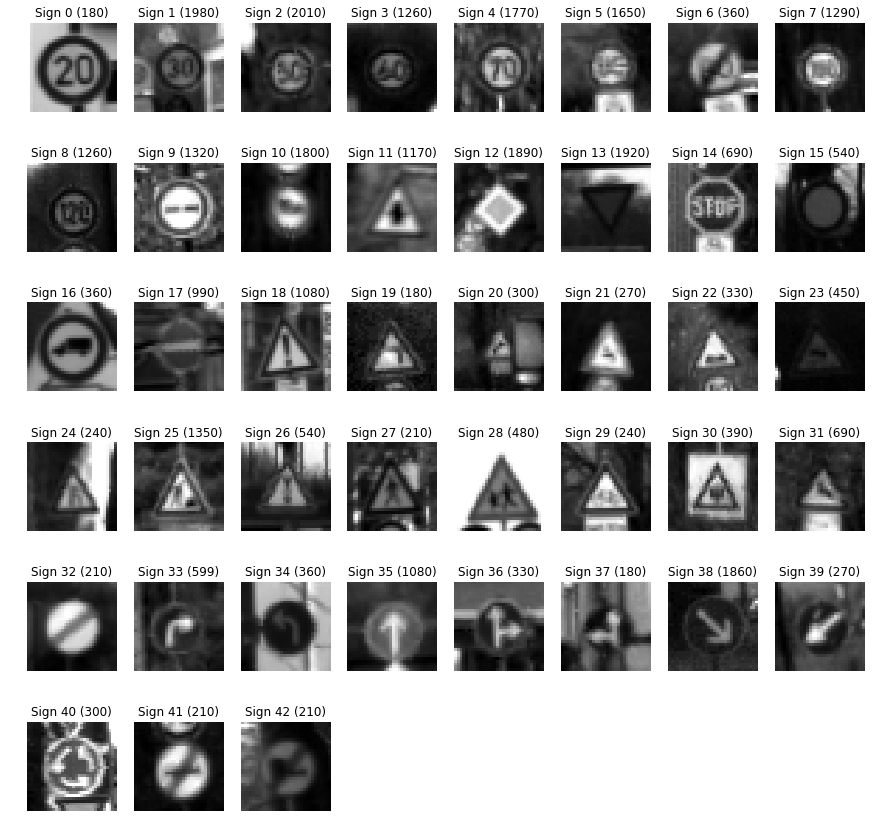

X_train.shape (34799, 32, 32, 3)


In [49]:
#6 Check if pre processing works as expected
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#z1 = np.array(X_train).astype(np.float32)
#print('z1.shape', z1.shape)
#preprocessed = preprocess_data(np.array(X_train).astype(np.float32))
preprocessed = preprocess_data(X_train)

#X_train = preprocessed
#print('X_train[0]: ', X_train[0])

#-----------------
#print('show_sign_and_count 1: ', X_in.shape)
#X_in = X_in.reshape(32,32) # the data is shaped as 32,32,1 after gray conversion as per Lenet placeholder
print('preprocessed.shape: ', preprocessed.shape)
print('preprocessed[0].shape: ', preprocessed[0].shape) # preprocessed[i].reshape(32,32)
print('len(preprocessed): ', len(preprocessed))

#reshape for plotting image
listX = []
for i in range(len(preprocessed)):
    listX.append(preprocessed[i].reshape(32,32))
    
preprocessed_plot = np.array(listX)

print('len(preprocessed_plot): ', len(preprocessed_plot))
print('preprocessed_plot[0].shape: ', preprocessed_plot[0].shape)
print('preprocessed_plot.shape: ', preprocessed_plot.shape)
#-----------------
show_sign_and_count(X_train, "NA") 
show_sign_and_count(preprocessed_plot, "GRAY") 

print('X_train.shape', X_train.shape)


### Augment the data 
Find the labels or classes of images that are under represented.

Flip and blur the images of those classes and add them back to the training set so that the size of those images is tripled

X_train shape:  (34799, 32, 32, 3) .. (34799, 32, 32, 3)
Augmented 690 images to class 31
Augmented 690 images to class 14
Augmented 599 images to class 33
Augmented 540 images to class 26
Augmented 540 images to class 15
Augmented 480 images to class 28
Augmented 450 images to class 23
Augmented 390 images to class 30
Augmented 360 images to class 16
Augmented 360 images to class 34
Augmented 360 images to class 6
Augmented 330 images to class 36
Augmented 330 images to class 22
Augmented 300 images to class 40
Augmented 300 images to class 20
Augmented 270 images to class 39
Augmented 270 images to class 21
Augmented 240 images to class 29
Augmented 240 images to class 24
Augmented 210 images to class 41
Augmented 210 images to class 42
Augmented 210 images to class 32
size of images to plot:  210
plotting first 50 images


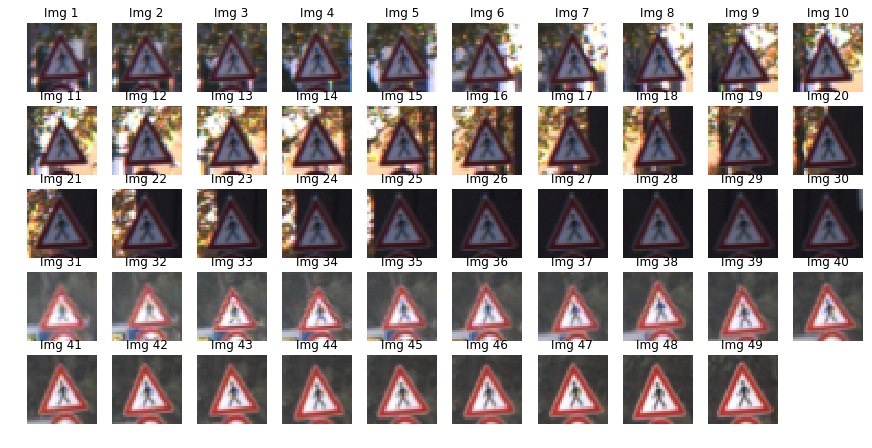

size of images to plot:  210
plotting first 50 images


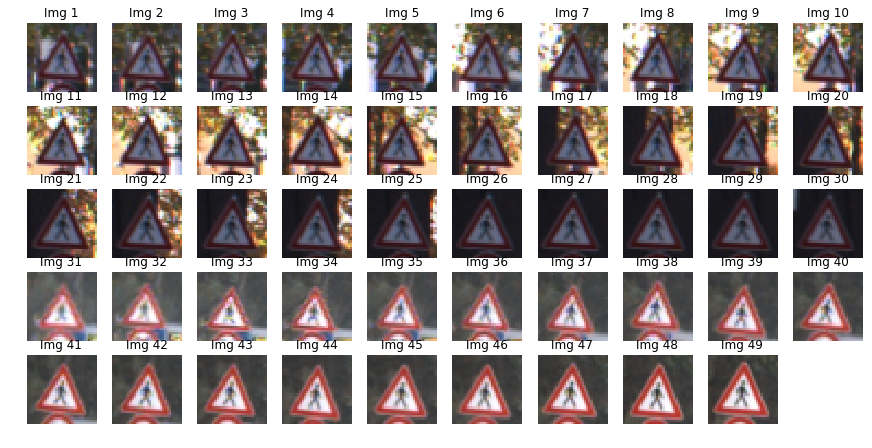

size of images to plot:  210
plotting first 50 images


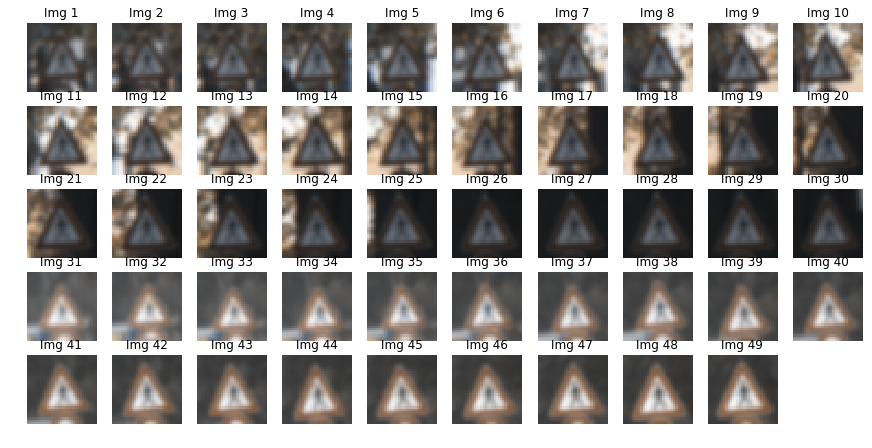

Augmented 210 images to class 27
Augmented 180 images to class 37
Augmented 180 images to class 19
Augmented 180 images to class 0
len(X_train):  34799  len(y_train):  34799
len(X_train_a):  53037  len(y_train_a):  53037


In [50]:
#7
from scipy import ndimage

def flip_images(inp_img_arr, label_to_augment):
    listX = []
    listY = []
    for image in inp_img_arr:
        flip_1 = np.fliplr(image)
        listX.append(flip_1)
        listY.append(label_to_augment)
    
    return np.array(listX), np.array(listY)
    

def blur_images(inp_img_arr, label_to_augment):
    listX = []
    listY = []
    for image in inp_img_arr:
        blur_image = ndimage.gaussian_filter(image, sigma=random.randint(1,1))  #making 1,5 1,10 etc will blur more
        listX.append(blur_image)
        listY.append(label_to_augment)
    
    return np.array(listX), np.array(listY)

   
'''Return a list containing all of the images of class 'img_class',  from dataset X'''
def get_label_images(img_class, X, y):
   
    y_hist = np.bincount(y)
    n_instances = y_hist[img_class]
    #n_instances = get_num_instances(img_class, y)
    class_images = []
    
    first_index = np.where(y == img_class)  #indices of all images with a certain label
    for i in range(n_instances):
        image = X[first_index[0][i]].squeeze()
        class_images.append(image)

    return class_images


def plot_images(inp_images):
     # Initialize the figure
    plt.figure(figsize=(15, 15))
    count = 1
    n_images = len(inp_images)
    print('size of images to plot: ', len(inp_images))
    print('plotting first 50 images') #100
    #plot only first 100 images
    if (n_images >= 50): #100
        n_images = 50  #100
    
    for image in inp_images:
        if(count < n_images):
            # Define 100 subplots 
            plt.subplot(10,10, count)
            # Don't include axes
            plt.axis('off')
            # Add a title to each subplot 
            #plt.title("Sign {0} ({1})".format(label, len(first_index[0]))) #labels.count(label)
            plt.title("Img {0}".format(count)) #labels.count(label)
            count += 1 # update the counter
            # And you plot this first image
            plt.imshow(image, cmap="gray")
            #color_map = "GRAY"
            #print('color_map: ', color_map)
            #if(color_map == "GRAY"):
                #print('gray color_map: ', color_map)
            #    plt.imshow(image, cmap="gray")
            #else:    
            #    plt.imshow(image)

    plt.show() # Show the plot
    
#def augment_label(label_images, class_to_augment, X, y, num):
#    nimages = len(class_images)


ncols=10
#19: 180, 0: 180
#labels_to_augment = [18] #, 0,19  - use 18 for testing and using for write up

#These classes have less samples - make the count equal to 1000 for each of them -- flip and blur?  - the size will triple
#training sample count by class: Counter({2: 2010, 1: 1980, 13: 1920, 12: 1890, 38: 1860, 10: 1800, 4: 1770, 5: 1650, 
#25: 1350, 9: 1320, 7: 1290, 3: 1260, 8: 1260, 11: 1170, 35: 1080, 18: 1080, 17: 990, 31: 690, 14: 690, 33: 599, 26: 540,
#15: 540, 28: 480, 23: 450, 30: 390, 16: 360, 34: 360, 6: 360, 36: 330, 22: 330, 40: 300, 20: 300, 39: 270, 21: 270, 
#29: 240, 24: 240, 41: 210, 42: 210, 32: 210, 27: 210, 37: 180, 19: 180, 0: 180})
# plot only label 27
#These are test data
labels_to_augment = [31, 14, 33, 26, 15, 28, 23, 30, 16, 34, 6, 36, 22, 40, 20, 39, 21, 29, 24, 41, 42, 32, 27, 37, 19, 0] 

print('X_train shape: ', X_train.shape, '..',X_train.shape)
X_train_aug = X_train # initialize
y_train_aug = y_train
for label_to_augment in labels_to_augment:
    label_images = get_label_images(label_to_augment, X=X_train, y=y_train)
    n_images = len(label_images)
    flip_X, flip_Y = flip_images(label_images, label_to_augment)
    blur_X, blur_Y = blur_images(label_images, label_to_augment)
    
    #comment to save time but uncomment for submission
    if(label_to_augment == 27):  #pedestrain crossing, easy to see result of flip and blur
        plot_images(label_images)
        plot_images(flip_X)
        plot_images(blur_X)
    #n_images, X_train, y_train = augment_label(label_images, label_to_augment, X=X_train, y=y_train, num=1)
    print("Augmented {} images to class {}".format(n_images, label_to_augment))

    #append augmented data for individual labels
    X_train_aug = np.concatenate((X_train_aug, flip_X, blur_X))
    y_train_aug = np.concatenate((y_train_aug, flip_Y,blur_Y))

    #print('flip_X shape: ', flip_X.shape, '..',flip_Y.shape)
    #print('blur_X shape: ', blur_X.shape, '..',blur_Y.shape)
#Append all augmented data to the training set
print('len(X_train): ', len(X_train), ' len(y_train): ', len(y_train))
#Append data from flip_X, flip_Y and blur_X, blur_Y to the original data set
#X_train_a = np.concatenate((X_train, flip_X, blur_X))
#y_train_a = np.concatenate((y_train, flip_Y,blur_Y))
print('len(X_train_a): ', len(X_train_aug), ' len(y_train_a): ', len(X_train_aug))
    
#Augment Validation Data
#validationsample count by class: Counter({1: 240, 13: 240, 2: 240, 4: 210, 5: 210, 38: 210, 10: 210, 12: 210, 3: 150, 
#11: 150, 9: 150, 8: 150, 7: 150, 25: 150, 35: 120, 18: 120, 17: 120, 31: 90, 33: 90, 14: 90, 15: 90, 36: 60, 26: 60, 
#23: 60, 40: 60, 22: 60, 16: 60, 34: 60, 6: 60, 30: 60, 21: 60, 20: 60, 28: 60, 41: 30, 37: 30, 19: 30, 42: 30, 0: 30, 
#32: 30, 27: 30, 29: 30, 24: 30, 39: 30})
#for validation data
labels_to_augment_v = [31, 33, 14, 15, 36, 26, 23, 40, 22, 16, 34, 6, 30, 21, 20, 28, 41, 37, 19, 42, 0, 32, 27, 29, 24, 39]

#Augmenting the validation set may not be required
    

In [51]:
#variables
# Save the augmented data for later use
new_train_file = "../data/aug_train.p"

In [52]:
#8 save augmented data
import os

def save_updated_data(file, Xa, ya):
    print('Saving data ({} samples) to {}'.format(len(Xa), file))
    try:
        with open(file, 'wb') as pfile:
            pickle.dump(
                {
                    'features': Xa,
                    'labels': ya,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', file, ':', e)
        raise

    print('Data cached in pickle file.')

# Save the augmented data for later use
new_train_file = "../data/aug_train.p"
save_updated_data(new_train_file, X_train_aug, y_train_aug)

Saving data (53037 samples) to ../data/aug_train.p
Data cached in pickle file.


In [53]:
#9 load augmented data
#start from here for training
with open(new_train_file, mode='rb') as f:
    train = pickle.load(f)
X_train, y_train = train['features'], train['labels']
assert(len(X_train) == len(y_train))
print("loaded {} samples from {}".format(len(X_train), new_train_file))

print('Shape X_train: ',  X_train.shape, ' y_train: ',y_train.shape)

loaded 53037 samples from ../data/aug_train.p
Shape X_train:  (53037, 32, 32, 3)  y_train:  (53037,)


43


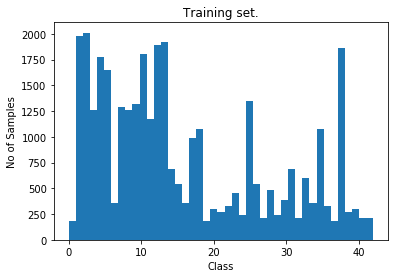

43


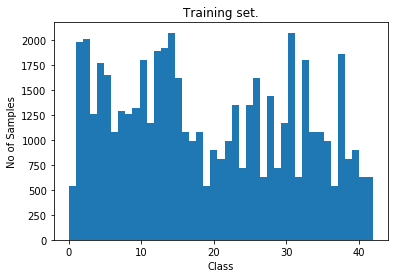

In [54]:
#10 print the augmented data as a histogram
single_histogram(y_train_0)
single_histogram(y_train)
#This histogram shows that the data that was sparse earlier has been augmented by 200%. 
#So this should be a good starting point for training


In [55]:
#11 (*) Run the preprocess on training, validation and test data sets as the Lenet expected data in single dimension instead of RGB
# pre process all data to begin training, earlier only the training data before augmentation was pre processed
X_train = preprocess_data(X_train)
X_valid = preprocess_data(X_valid)
X_test = preprocess_data(X_test)
#y_train, y_valid, y_test

print('Shape X_train: ',  X_train.shape, ' y_train: ',y_train.shape)
print('Shape X_valid: ',  X_valid.shape, ' y_valid: ',y_valid.shape)
print('Shape X_test: ',  X_test.shape, ' y_test: ',y_test.shape)
print('Done...')
#Shuffle the training data before training. Shuffle is also called after each EPOCH
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

X_in color shape (53037, 32, 32, 3)
gray_X gray shape 1 (53037, 32, 32)
gray_X gray shape 2 (53037, 32, 32, 1)
pre process - n_channels:  1
X_in color shape (4410, 32, 32, 3)
gray_X gray shape 1 (4410, 32, 32)
gray_X gray shape 2 (4410, 32, 32, 1)
pre process - n_channels:  1
X_in color shape (12630, 32, 32, 3)
gray_X gray shape 1 (12630, 32, 32)
gray_X gray shape 2 (12630, 32, 32, 1)
pre process - n_channels:  1
Shape X_train:  (53037, 32, 32, 1)  y_train:  (53037,)
Shape X_valid:  (4410, 32, 32, 1)  y_valid:  (4410,)
Shape X_test:  (12630, 32, 32, 1)  y_test:  (12630,)
Done...


### Model Architecture

In [56]:
#12
### Define your architecture here.

#EPOCHS = 60 #10
#BATCH_SIZE = 128 #64 #16 #128

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

###Train the model

Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.
### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.
**Activation.** Your choice of activation function.
**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.
**Activation.** Your choice of activation function.
**Pooling.** The output shape should be 5x5x16.
**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.
**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.
**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [57]:
#13
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob = 0.5):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    print('Lenet, x shape: ', x.shape, '/ keep_prob=', keep_prob)
    # Store layers weight & bias
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #x = x_train
    #-------------------------------------------#
    #strides=[1, 1, 1, 1] = [batch, input_height, input_width, input_channels]; batch, input_channels are generally 1
    #ksize=[1, 2, 2, 1] - same as strides -- 2x2 is the area used for max pooling
    #VALID padding - dont go beyond the edge, SAME - add zeros on all sides
    #max pool ksize 
    #-------------------------------------------#
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b    
    #conv1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID', biases['bc1'])
    # Activation.
    #layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
    conv1 = tf.nn.relu(conv1)
    #(32-5+1)/1 = 28
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    ##conv1 = maxpool2d(conv1, k=2)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
           
    # Layer 2: Convolutional.Input = 14x14x6; Output = 10x10x16. -- input channels = 6, output = 16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2  = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b    
    #conv2 = conv2d(layer_1, weights['wc2'], biases['bc2'])
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    #layer_2 = maxpool2d(layer_2, k=2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # Flatten. Input = 5x5x16. Output = 400.
    #Flatten layer. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 
    #The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.add(tf.matmul(fc0, fc1_W), fc1_b)  #tf.matmul(fc0, fc1_W) + fc1_b
    #fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    #fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    
    # Activation.
    fc1 = tf.nn.relu(fc1)
    ############
    #use a dropout layer here 
    #dropout_layer_1 = tf.nn.dropout(fc1, keep_prob)
    #fc1 = dropout_layer_1
    ####
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.add(tf.matmul(fc1, fc2_W), fc2_b) # fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    #fc2 = tf.reshape(conv2, [-1, weights['wd2'].get_shape().as_list()[0]])
    #fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
   
    # Activation.
    fc2 = tf.nn.relu(fc2)
    ##
    #use a dropout layer here 
    dropout_layer_2 = tf.nn.dropout(fc2, keep_prob)
    fc2 = dropout_layer_2
    ##
    # Layer 5: Fully Connected. Input = 84. Output = 43 #10.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma)) #84, 10
    fc3_b = tf.Variable(tf.zeros(43)) #10
    logits = tf.add(tf.matmul(fc2, fc3_W),fc3_b) #logits = tf.matmul(fc2, fc3_W) + fc3_b
    #logits = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return logits, conv1, conv2 

#conv1 and conv2 are returned to visualize the network state with test images



## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [58]:
#14

### Define your architecture here. #12

EPOCHS = 100 #10
BATCH_SIZE = 128 #64 #16 #128

#x = tf.placeholder(tf.float32, (None, 32, 32, 1)) #n_channels = 3 if netowrk input is RGB
x = tf.placeholder(tf.float32, (None, 32, 32, n_channels)) 
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes) # 43 #should be equal to the number of classes10

rate = 0.001 #0.0005 #0.001 #learning rate
keep_prob = tf.placeholder(tf.float32)

print('x.shape: ', x.shape, ' y.shape: ', y.shape)

x.shape:  (?, 32, 32, 1)  y.shape:  <unknown>


## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

In [59]:
#15
#rate = 0.0005 #0.001 #learning rate
#keep_prob = tf.placeholder(tf.float32)

#def build_graph():
#logits = LeNet(x)
logits, conv1, conv2 = LeNet(x, keep_prob=0.5)
# cross entropy - convert probability to logits - 0 or 1
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
#Training loss – we want all distances to be small to ensure we are classifying all examples in training data. 
#We want the loss to be small, its function of weights and biases. Minimize the function for average loss
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#return cross_entropy, training_operation
#
#cross_entropy, training_operation = build_graph()
#

Lenet, x shape:  (?, 32, 32, 1) / keep_prob= 0.5


## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [60]:
#16
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    #divide total samples by batch size and iterate over batch size
    #for x in range(0,10, 2):  0, 2, 4, 6, 8 -- [0,0:2]  [2,2:4] [4,4:6] [6,6:8] [8,8:10]
    for offset in range(0, num_examples, BATCH_SIZE): # BATCH_SIZE = 128
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


class TrainingResults():
    def __init__(self, losses=[], valid_accuracy=[], train_accuracy=[]):
        self.losses = losses
        self.valid_accu = valid_accuracy
        self.train_accu = train_accuracy
        #self.batches = batches
        #self.class_errors = class_errors
        #self.errors = errors

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [61]:
#17
import math
from tqdm import tqdm

tr_results = TrainingResults()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    #train data size is 55000 samples
    # ?? run through the training data 10 times, shuffle each time and check accuracy
    for epoch_i in range(EPOCHS):  # EPOCHS = 10
        epoch_loss_n = []
        X_train, y_train = shuffle(X_train, y_train)
        # Progress bar
        batch_count = int(math.ceil(len(X_train)/BATCH_SIZE))
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, EPOCHS), unit='batches')
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #print('shape X_train: ', X_train.shape, ' y_train: ',y_train.shape)
            #print('shape batch_x: ', batch_x.shape, ' batch_y: ',batch_y.shape)
            #shape X_train:  (53037, 32, 32, 1)  y_train:  (53037,)
            #shape batch_x:  (16, 32, 32, 1)  batch_y:  (16,)
            
            #sess.run([training_operation], feed_dict={x: batch_x, y: batch_y})
            _, lossVal = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})
            epoch_loss_n.append(lossVal)
                
            #result = sess.run([cross_entropy, training_operation], feed_dict={x: batch_x, y: batch_y})
            #print('res: ', result)
            
        ###############
        # for each epoch, calculate the validation accuracy
        # model size is 5000 samples -- evaluate runs for the entire batch per EPOCH
        validation_accuracy = evaluate(X_valid, y_valid) #X_validation, y_validation)
        train_loss = np.mean(np.array(epoch_loss_n))
        tr_results.valid_accu.append(validation_accuracy)
        tr_results.losses.append(train_loss)
        
        print("EPOCH {} ...".format(epoch_i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        #
        #training_accuracy = evaluate(X_train, y_train)
        #print("Training Accuracy = {:.3f}".format(training_accuracy))
        
        print("Training Loss = {:.3f}".format(train_loss))
        #
        ##
        #accuracy_operation
        #loss_operation       
        #X_train = preprocess_data(X_train)
        #X_valid = preprocess_data(X_valid)
        #X_test = preprocess_data(X_test)
        #y_train, y_valid, y_test
        ##
   
    #save the training results in the lenet folder
    saver.save(sess, './trafficSignModel')
    print("Traffic sign Model saved")


Epoch  1/100:   0%|          | 0/415 [00:00<?, ?batches/s]

Training...





Epoch  2/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 1 ...
Validation Accuracy = 0.669

Training Loss = 2.082





Epoch  3/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 2 ...
Validation Accuracy = 0.782

Training Loss = 0.763




Epoch  4/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 3 ...
Validation Accuracy = 0.815

Training Loss = 0.493





Epoch  5/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 4 ...
Validation Accuracy = 0.828

Training Loss = 0.370





Epoch  6/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 5 ...
Validation Accuracy = 0.854

Training Loss = 0.291





Epoch  7/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 6 ...
Validation Accuracy = 0.874

Training Loss = 0.244




Epoch  8/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 7 ...
Validation Accuracy = 0.883

Training Loss = 0.207





Epoch  9/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 8 ...
Validation Accuracy = 0.888

Training Loss = 0.177





Epoch 10/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 9 ...
Validation Accuracy = 0.892

Training Loss = 0.156




Epoch 11/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 10 ...
Validation Accuracy = 0.894

Training Loss = 0.138





Epoch 12/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 11 ...
Validation Accuracy = 0.899

Training Loss = 0.125





Epoch 13/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 12 ...
Validation Accuracy = 0.900

Training Loss = 0.111





Epoch 14/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 13 ...
Validation Accuracy = 0.901

Training Loss = 0.101




Epoch 15/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 14 ...
Validation Accuracy = 0.906

Training Loss = 0.096





Epoch 16/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 15 ...
Validation Accuracy = 0.907

Training Loss = 0.087





Epoch 17/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 16 ...
Validation Accuracy = 0.914

Training Loss = 0.084




Epoch 18/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 17 ...
Validation Accuracy = 0.914

Training Loss = 0.071





Epoch 19/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 18 ...
Validation Accuracy = 0.910

Training Loss = 0.073





Epoch 20/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 19 ...
Validation Accuracy = 0.908

Training Loss = 0.064




Epoch 21/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 20 ...
Validation Accuracy = 0.919

Training Loss = 0.065





Epoch 22/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 21 ...
Validation Accuracy = 0.919

Training Loss = 0.057





Epoch 23/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 22 ...
Validation Accuracy = 0.924

Training Loss = 0.055





Epoch 24/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 23 ...
Validation Accuracy = 0.926

Training Loss = 0.054




Epoch 25/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 24 ...
Validation Accuracy = 0.916

Training Loss = 0.054





Epoch 26/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 25 ...
Validation Accuracy = 0.926

Training Loss = 0.049





Epoch 27/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 26 ...
Validation Accuracy = 0.922

Training Loss = 0.045




Epoch 28/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 27 ...
Validation Accuracy = 0.923

Training Loss = 0.040





Epoch 29/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 28 ...
Validation Accuracy = 0.923

Training Loss = 0.042





Epoch 30/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 29 ...
Validation Accuracy = 0.918

Training Loss = 0.041





Epoch 31/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 30 ...
Validation Accuracy = 0.919

Training Loss = 0.039




Epoch 32/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 31 ...
Validation Accuracy = 0.933

Training Loss = 0.040





Epoch 33/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 32 ...
Validation Accuracy = 0.930

Training Loss = 0.038





Epoch 34/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 33 ...
Validation Accuracy = 0.925

Training Loss = 0.039




Epoch 35/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 34 ...
Validation Accuracy = 0.931

Training Loss = 0.032





Epoch 36/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 35 ...
Validation Accuracy = 0.925

Training Loss = 0.031





Epoch 37/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 36 ...
Validation Accuracy = 0.925

Training Loss = 0.036





Epoch 38/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 37 ...
Validation Accuracy = 0.931

Training Loss = 0.032




Epoch 39/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 38 ...
Validation Accuracy = 0.930

Training Loss = 0.032





Epoch 40/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 39 ...
Validation Accuracy = 0.928

Training Loss = 0.029





Epoch 41/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 40 ...
Validation Accuracy = 0.933

Training Loss = 0.024




Epoch 42/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 41 ...
Validation Accuracy = 0.930

Training Loss = 0.030





Epoch 43/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 42 ...
Validation Accuracy = 0.926

Training Loss = 0.027





Epoch 44/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 43 ...
Validation Accuracy = 0.932

Training Loss = 0.031





Epoch 45/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 44 ...
Validation Accuracy = 0.930

Training Loss = 0.025




Epoch 46/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 45 ...
Validation Accuracy = 0.940

Training Loss = 0.021





Epoch 47/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 46 ...
Validation Accuracy = 0.939

Training Loss = 0.023





Epoch 48/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 47 ...
Validation Accuracy = 0.929

Training Loss = 0.024




Epoch 49/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 48 ...
Validation Accuracy = 0.933

Training Loss = 0.028





Epoch 50/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 49 ...
Validation Accuracy = 0.934

Training Loss = 0.020





Epoch 51/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 50 ...
Validation Accuracy = 0.932

Training Loss = 0.024





Epoch 52/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 51 ...
Validation Accuracy = 0.931

Training Loss = 0.021




Epoch 53/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 52 ...
Validation Accuracy = 0.929

Training Loss = 0.023





Epoch 54/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 53 ...
Validation Accuracy = 0.939

Training Loss = 0.021





Epoch 55/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 54 ...
Validation Accuracy = 0.933

Training Loss = 0.017




Epoch 56/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 55 ...
Validation Accuracy = 0.942

Training Loss = 0.019





Epoch 57/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 56 ...
Validation Accuracy = 0.934

Training Loss = 0.025





Epoch 58/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 57 ...
Validation Accuracy = 0.937

Training Loss = 0.023





Epoch 59/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 58 ...
Validation Accuracy = 0.938

Training Loss = 0.020




Epoch 60/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 59 ...
Validation Accuracy = 0.933

Training Loss = 0.023





Epoch 61/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 60 ...
Validation Accuracy = 0.941

Training Loss = 0.016





Epoch 62/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 61 ...
Validation Accuracy = 0.937

Training Loss = 0.014




Epoch 63/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 62 ...
Validation Accuracy = 0.937

Training Loss = 0.024





Epoch 64/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 63 ...
Validation Accuracy = 0.938

Training Loss = 0.016





Epoch 65/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 64 ...
Validation Accuracy = 0.931

Training Loss = 0.020





Epoch 66/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 65 ...
Validation Accuracy = 0.934

Training Loss = 0.018




Epoch 67/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 66 ...
Validation Accuracy = 0.935

Training Loss = 0.019





Epoch 68/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 67 ...
Validation Accuracy = 0.936

Training Loss = 0.018





Epoch 69/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 68 ...
Validation Accuracy = 0.931

Training Loss = 0.021




Epoch 70/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 69 ...
Validation Accuracy = 0.933

Training Loss = 0.018





Epoch 71/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 70 ...
Validation Accuracy = 0.937

Training Loss = 0.013





Epoch 72/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 71 ...
Validation Accuracy = 0.940

Training Loss = 0.017




Epoch 73/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 72 ...
Validation Accuracy = 0.938

Training Loss = 0.019





Epoch 74/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 73 ...
Validation Accuracy = 0.940

Training Loss = 0.014





Epoch 75/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 74 ...
Validation Accuracy = 0.936

Training Loss = 0.014





Epoch 76/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 75 ...
Validation Accuracy = 0.927

Training Loss = 0.020




Epoch 77/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 76 ...
Validation Accuracy = 0.932

Training Loss = 0.019





Epoch 78/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 77 ...
Validation Accuracy = 0.938

Training Loss = 0.015





Epoch 79/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 78 ...
Validation Accuracy = 0.939

Training Loss = 0.015




Epoch 80/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 79 ...
Validation Accuracy = 0.930

Training Loss = 0.014





Epoch 81/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 80 ...
Validation Accuracy = 0.932

Training Loss = 0.014





Epoch 82/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 81 ...
Validation Accuracy = 0.938

Training Loss = 0.013





Epoch 83/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 82 ...
Validation Accuracy = 0.936

Training Loss = 0.015




Epoch 84/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 83 ...
Validation Accuracy = 0.938

Training Loss = 0.016





Epoch 85/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 84 ...
Validation Accuracy = 0.938

Training Loss = 0.017





Epoch 86/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 85 ...
Validation Accuracy = 0.933

Training Loss = 0.013




Epoch 87/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 86 ...
Validation Accuracy = 0.934

Training Loss = 0.019





Epoch 88/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 87 ...
Validation Accuracy = 0.938

Training Loss = 0.017





Epoch 89/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 88 ...
Validation Accuracy = 0.934

Training Loss = 0.011





Epoch 90/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 89 ...
Validation Accuracy = 0.934

Training Loss = 0.012




Epoch 91/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 90 ...
Validation Accuracy = 0.935

Training Loss = 0.012





Epoch 92/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 91 ...
Validation Accuracy = 0.943

Training Loss = 0.016





Epoch 93/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 92 ...
Validation Accuracy = 0.938

Training Loss = 0.015




Epoch 94/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 93 ...
Validation Accuracy = 0.936

Training Loss = 0.011





Epoch 95/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 94 ...
Validation Accuracy = 0.934

Training Loss = 0.015





Epoch 96/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 95 ...
Validation Accuracy = 0.934

Training Loss = 0.012





Epoch 97/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 96 ...
Validation Accuracy = 0.941

Training Loss = 0.010




Epoch 98/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 97 ...
Validation Accuracy = 0.936

Training Loss = 0.013





Epoch 99/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 98 ...
Validation Accuracy = 0.938

Training Loss = 0.015





Epoch 100/100:   0%|          | 0/415 [00:00<?, ?batches/s]

EPOCH 99 ...
Validation Accuracy = 0.940

Training Loss = 0.013


EPOCH 100 ...
Validation Accuracy = 0.943

Training Loss = 0.013
Traffic sign Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

## Test/Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

In [72]:
#18
import tensorflow as tf
#Test the model on the test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    #evaluate model accuracy on test data
    # Check accuracy against Test data after all EPOCHS -- at this point training is complete
    #test data size is 10000 samples
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))    
   
    assert test_accuracy >= 0.93, 'Test accuracy at {}, should be equal to or greater than 0.93'.format(test_accuracy)
    print('Nice Job! Test Accuracy is {}'.format(test_accuracy))
    
    
'''
#18
testVar = tf.Variable(initial_value='fake_variable')
#tf.get_variable_scope().reuse_variables()
loaded_graph = tf.Graph()
tf.train.import_meta_graph('trafficSignModel.meta')
new_saver = tf.train.Saver()

    
#Test the model on the test set
with tf.Session(graph=loaded_graph) as sess:
#with tf.Session() as sess:
    saver.restore(sess, './trafficSignModel') 
    #saver.restore(sess, tf.train.latest_checkpoint('.'))

    new_saver = tf.train.import_meta_graph('trafficSignModel.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))

'''

INFO:tensorflow:Restoring parameters from ./trafficSignModel
Test Accuracy = 0.917


AssertionError: Test accuracy at 0.9170229609392034, should be equal to or greater than 0.93

### Load and Output the Images

6
s3:  0
fname:  sample_images/ex_0_SpeedLimit_20kmh.png / (32, 32, 3) /class:  0
s3:  39
fname:  sample_images/ex_39_KeepLeft.png / (32, 32, 3) /class:  39
s3:  28
fname:  sample_images/ex_28_ChildrenCrossing.png / (32, 32, 3) /class:  28
s3:  13
fname:  sample_images/ex_13_Yield.png / (32, 32, 3) /class:  13
s3:  40
fname:  sample_images/ex_40_RoundaboutMandatory.png / (32, 32, 3) /class:  40
s3:  0
fname:  sample_images/ex_0_SpeedLimit_20kmh_2.png / (32, 32, 3) /class:  0
sample_imgs:  (6, 32, 32, 3) / 6


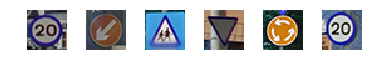

y_train;  30
sample_y:  [ 0 39 28 13 40  0]


In [73]:
#19
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import glob
import numpy as np

'''
image_1 = mpimg.imread('sample_images/ex_01_Arrow.png')
plt.imshow(image_1, cmap='gray')
image_2 = mpimg.imread('sample_images/ex_02_Yield.png')
plt.imshow(image_2, cmap='gray')
image_3 = mpimg.imread('sample_images/ex_03_round.png')
plt.imshow(image_3, cmap='gray')
image_4 = mpimg.imread('sample_images/ex_04_ChildrenCross.png')
plt.imshow(image_4, cmap='gray')
image_5 = mpimg.imread('sample_images/ex_05_20.png')
plt.imshow(image_5, cmap='gray')
image_6 = mpimg.imread('sample_images/ex_06_20_2.png')
plt.imshow(image_6, cmap='gray')
['39', 'Keep left']
['13', 'Yield']
['40', 'Roundabout mandatory']
['28', 'Children crossing']
['0', 'Speed limit (20km/h)']
'''
w=10
h=10
#fig=plt.figure(figsize=(8, 8))
columns = 6
rows = 1

images = glob.glob('sample_images/ex*.png')
print(len(images))

#X_truth = np.array([col[1] for 
listSX = []
listSY = []

#preprocessed_plot = np.array(listX)
                    
for idx, fname in enumerate(images):
    img_3d = cv2.imread(fname)
    listSX.append(img_3d)
    
    s1 = fname[fname.index("/")+1:]
    s2 = s1[s1.index("_")+1:]
    s3 = s2[:s2.index("_")]
    print('s3: ', s3)
    listSY.append(int(s3))
    
    print('fname: ', fname, '/', img_3d.shape, '/class: ', s3)
    plt.subplot(1, 6, idx+1)
    plt.axis('off')
    #print('X_in[traffic_signs[i]].shape: ', X_in[traffic_signs[i]].shape)
    plt.imshow(img_3d, cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    

sample_x = np.array(listSX)
sample_y = np.array(listSY)
print('sample_imgs: ', sample_x.shape, '/', len(sample_x))
plt.show()

print('y_train; ', y_train[0])
print('sample_y: ', sample_y)
#X_train, y_train = train['features'], train['labels'] 

### Predict the Sign Type for Each Image

In [77]:
#20
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

sample_x_pp = preprocess_data((sample_x))
print('Shape sample_x: ', sample_x.shape,  ' /sample_x_pp: ',  sample_x_pp.shape, ' /sample_y: ',sample_y.shape)

#saver.save(sess, './trafficSignModel')
with tf.Session() as sess:
    saver.restore(sess, './trafficSignModel') 
    predictions = sess.run(logits, feed_dict={x: sample_x_pp})


#print('predictions: ', predictions)
#argmax is a function which gives the index of the greatest number in the given row or column
#logits returns the actual predicted value -- the array is of size n_classes = 43 in this case
errors = 0
for pred,i in zip(predictions, range(len(predictions))):
    print("actual class/predicted class: {}/{}".format(sample_y[i], np.argmax(pred)))
    if np.argmax(pred) != sample_y[i]:
        errors += 1
        
correct_predictions = len(predictions) - errors
print("correct predictions:", correct_predictions) 
#x1=[[1,2],[3,4]] 
#for pred, i in zip(x1, range(len(x1))):
#    print(pred, '/',i)
#[1, 2] / 0
#[3, 4] / 1

X_in color shape (6, 32, 32, 3)
gray_X gray shape 1 (6, 32, 32)
gray_X gray shape 2 (6, 32, 32, 1)
pre process - n_channels:  1
Shape sample_x:  (6, 32, 32, 3)  /sample_x_pp:  (6, 32, 32, 1)  /sample_y:  (6,)
INFO:tensorflow:Restoring parameters from ./trafficSignModel
actual class/predicted class: 0/3
actual class/predicted class: 39/39
actual class/predicted class: 28/28
actual class/predicted class: 13/13
actual class/predicted class: 40/40
actual class/predicted class: 0/11
correct predictions: 4


### Analyze Performance

In [78]:
#21
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

nSamples = len(sample_y)
print("{} correct predictions of {} samples ({:.2f}%)".format(correct_predictions, nSamples, 100*correct_predictions/nSamples))


4 correct predictions of 6 samples (66.67%)


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [79]:
#22
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

image_probability = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, './trafficSignModel') 
    #cross_entropy, logits
    #cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    #probabilities = tf.nn.softmax(logits)
    #predictions = sess.run(probabilities, feed_dict={x: X_pp_truth})
    predictions = sess.run(image_probability, feed_dict={x: sample_x_pp})
    top5 = sess.run(tf.nn.top_k(tf.constant(predictions), k=5))


#print('top5.shape: ', top5.shape)
print(top5[0])
print(top5[1])

INFO:tensorflow:Restoring parameters from ./trafficSignModel
[[  8.54091287e-01   9.24208462e-02   5.34877963e-02   5.48200818e-10
    4.08606926e-10]
 [  1.00000000e+00   2.33676156e-23   1.48336406e-25   2.14750434e-35
    1.20261410e-38]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  9.99999642e-01   3.64119700e-07   1.88617812e-13   5.36281749e-21
    6.22557667e-23]
 [  9.99996424e-01   3.62470223e-06   1.26368616e-09   4.72087672e-15
    1.23626709e-17]]
[[ 1  5  3  2  8]
 [39 13 38 10  5]
 [28  0  1  2  3]
 [13  0  1  2  3]
 [40 12 10  7 42]
 [11  5 30  3  7]]


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [83]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
            

with tf.Session() as sess:
    #aver.restore(sess, './trafficSignModel') 
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    image_2 = mpimg.imread('sample_images/ex_13_Yield.png') #ex_13_Yield.png
    
    ix = int(np.random.random() * X_test.shape[0])
    random_image = np.expand_dims(X_test[ix], axis=0)
    
    #outputFeatureMap(image_2, conv1 ,plt_num=1)
    #outputFeatureMap(image_2, conv1 ,plt_num=2)
   

'''
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    ix = int(np.random.random() * x_test_n.shape[0])
    random_image = np.expand_dims(x_test_n[ix], axis=0)
    print('Feature maps for', signnames[y_test[ix]])
    plt.imshow(x_test[ix])
    plt.show()
    print('First convolutional layer')
    outputFeatureMap(random_image, conv1, plt_num=1)
    print('Second convolutional layer')
    outputFeatureMap(random_image, conv2, plt_num=2) '''

'''
From lesson 13 - Visualizing layers

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# Note: that to get access to tf_activation, the session should be interactive which can be achieved with the following commands.
# sess = tf.InteractiveSession()
# sess.as_default()

# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and    max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            '''

INFO:tensorflow:Restoring parameters from ./trafficSignModel


'\nFrom lesson 13 - Visualizing layers\n\n# image_input: the test image being fed into the network to produce the feature maps\n# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer\n# Note: that to get access to tf_activation, the session should be interactive which can be achieved with the following commands.\n# sess = tf.InteractiveSession()\n# sess.as_default()\n\n# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and    max values of the output\n# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry\n\ndef outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):\n    # Here make sure to preprocess your image_input in a way your network expects\n    # with size, normalization, ec